# Análise Fatorial Exploratória

Nesta atividade iremos trabalho com um conjunto de dados od [ifood](https://www.kaggle.com/datasets/jackdaoud/marketing-data). Este conjunto sofreu um pre tratamento para podermos focar mais na análise fatorial.

## Atividade 1: Importe os dados e verifique se há dados faltantes. Se houver dados faltantes, faça os tratamentos adequados. 

In [14]:
# Importando a biblioteca pandas
import pandas as pd
import numpy as np

In [15]:
# Carregando os dados do arquivo Excel
df = pd.read_excel('ifood2 - base.xlsx')

# Exibindo as primeiras linhas do DataFrame
df.head()

,ID,ano_nascimento,nivel_educacao,estado_civil,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,...,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,reclamou_ult_2anos
0,6862,1971,graduado,divorciado,650.38,0,0,42,65,1,...,3,1,1,15,0,0,0,20,0,0
1,5376,1979,graduado,casado,919.92,1,0,539,42,1,...,1725,1,1,15,0,28,0,1,0,0
2,11110,1973,graduado,solteiro,1316.54,1,0,442,56,2,...,1,0,0,0,0,0,0,14,0,0
3,9931,1963,doutorado,casado,1512.41,1,1,6,29,5,...,1,1,1,15,0,0,0,19,0,0
4,10311,1969,graduado,casado,1664.66,0,1,267,0,16,...,12,2,4,0,25,0,0,1,0,0


In [16]:
# Verificando se há dados faltantes
missing_data = df.isnull().sum()
missing_data

ID                              0
ano_nascimento                  0
nivel_educacao                  0
estado_civil                    0
renda_mensal                    0
num_filhos_pequenos             0
num_filhos_adolescentes         0
num_dias_primeira_compra        0
num_dias_ultima_compra          0
gasto_vinho_ult_2anos           0
gasto_prod_frutas_ult_2anos     0
gasto_prod_carne_ult_2anos      0
gasto_prod_peixe_ult_2anos      0
gasto_prod_doces_ulti_2anos     0
qtde_compras_desconto           0
qtde_compras_web_restaurante    0
qtde_compras_catalogo           0
qtde_compras_loja               0
qtde_vistas_web_ult_mes         0
aceitou_qtde_oferta             0
reclamou_ult_2anos              0
dtype: int64

## Atividade 2: Faça uma preparação dos dados, isto é, elimine colunas irrelevantes e transforme colunas categóricas usando One Hot Encoding.

In [17]:
#retirando colunas ano_nascimento, estado civil e reclamou_ult_2anos pois não serão utilizadas
df = df.drop(columns={'ano_nascimento','estado_civil','reclamou_ult_2anos'})

In [18]:
df['nivel_educacao'].unique()

array(['graduado', 'doutorado', 'mestrado', 'ensino_medio', 'pos'],
      dtype=object)

In [19]:
# Cria um mapeamento entre as categorias originais e as novas categorias numéricas
education_mapping = {
    'ensino_medio': 1,
    'graduado': 2,
    'pos': 3,
    'mestrado': 4,
    'doutorado': 5
}

# Aplica o mapeamento à coluna 'nivel_educacao'
df['nivel_educacao'] = df['nivel_educacao'].map(education_mapping)

# Verifica os valores únicos na coluna 'nivel_educacao'
df['nivel_educacao'].unique()

array([2, 5, 4, 1, 3], dtype=int64)

In [21]:
data = df.drop(['ID'], axis=1)
data.head()

,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta
0,2,650.38,0,0,42,65,1,1,3,1,1,15,0,0,0,20,0
1,2,919.92,1,0,539,42,1,1,1725,1,1,15,0,28,0,1,0
2,2,1316.54,1,0,442,56,2,1,1,0,0,0,0,0,0,14,0
3,5,1512.41,1,1,6,29,5,0,1,1,1,15,0,0,0,19,0
4,2,1664.66,0,1,267,0,16,4,12,2,4,0,25,0,0,1,0


## Atividade 3: Coloque os dados numa mesma escala e faça um heatmap para observar a correlação.

In [22]:
# importando StandardScaler
from sklearn.preprocessing import StandardScaler

# aplicando a padronização
scaler = StandardScaler()
data_encoded[data.columns] = scaler.fit_transform(data)

data_encoded.head()

,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta
0,-0.819614,-2.010675,-0.826459,-0.929785,-1.541122,0.547625,-0.899264,-0.635710,-0.726203,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,6.056590,-0.501375
1,-0.819614,-1.982125,1.030790,-0.929785,0.919043,-0.246892,-0.899264,-0.635710,6.902445,-0.668911,-0.631638,6.562937,-1.469078,8.678058,-1.779682,-1.781003,-0.501375
2,-0.819614,-1.940113,1.030790,-0.929785,0.438890,0.236727,-0.896295,-0.635710,-0.735063,-0.687285,-0.655856,-1.202564,-1.469078,-0.910659,-1.779682,3.581561,-0.501375
3,1.530950,-1.919366,1.030790,0.906787,-1.719323,-0.695967,-0.887388,-0.660865,-0.735063,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,5.644085,-0.501375
4,-0.819614,-1.903240,-0.826459,0.906787,-0.427365,-1.697749,-0.854727,-0.560242,-0.686332,-0.650537,-0.558984,-1.202564,7.526593,-0.910659,-1.779682,-1.781003,-0.501375


<Axes: >

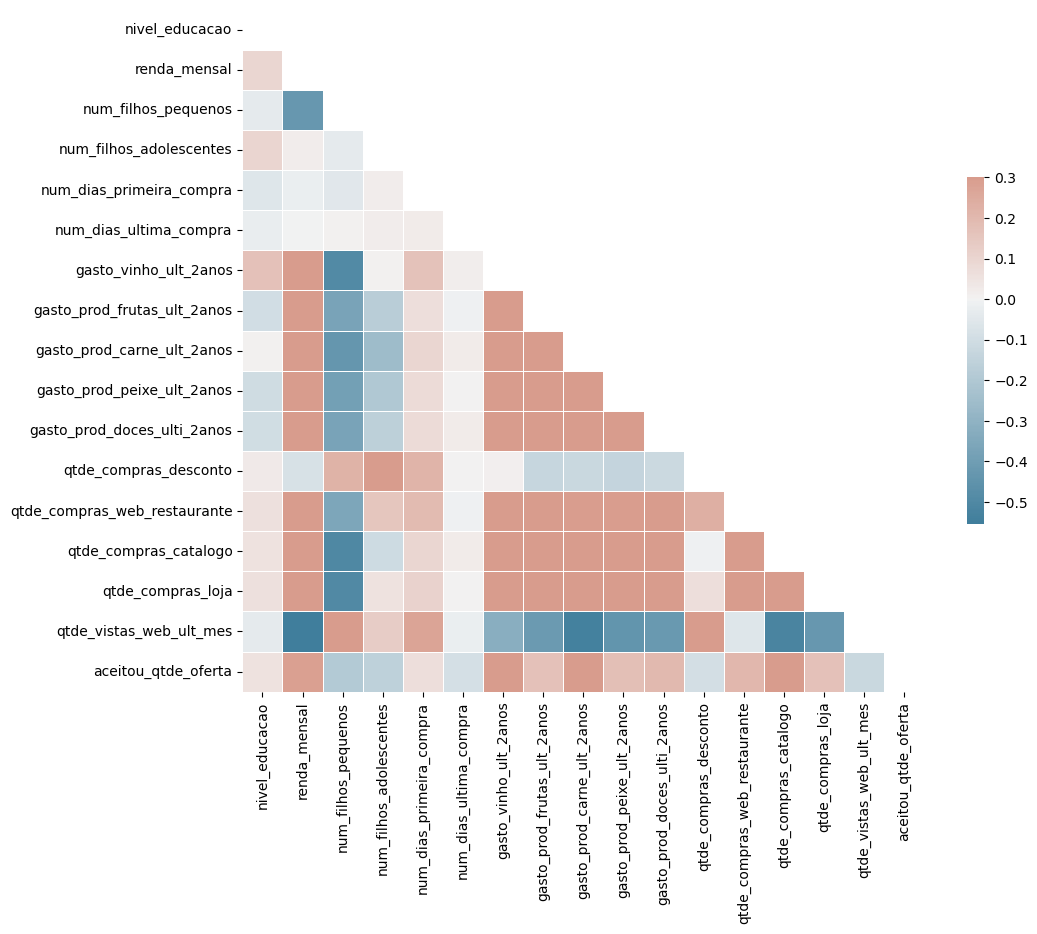

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_encoded.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Atividade 4: Há um grupo de variáveis que trazem informações muito parecidas e possuem correlação entre si. Transforme todas essas variáveis em uma única.

In [24]:
# grupo de variáveis de gastos possui alta correlação entre si. Somaremos todas elas na variável "gastos_ult_2anos"
df['gastos_ult_2anos'] = df['gasto_vinho_ult_2anos'] + df['gasto_prod_frutas_ult_2anos'] + df['gasto_prod_carne_ult_2anos'] + df['gasto_prod_peixe_ult_2anos'] + df['gasto_prod_doces_ulti_2anos']
df.head()

,ID,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,gastos_ult_2anos
0,6862,2,650.38,0,0,42,65,1,1,3,1,1,15,0,0,0,20,0,7
1,5376,2,919.92,1,0,539,42,1,1,1725,1,1,15,0,28,0,1,0,1729
2,11110,2,1316.54,1,0,442,56,2,1,1,0,0,0,0,0,0,14,0,4
3,9931,5,1512.41,1,1,6,29,5,0,1,1,1,15,0,0,0,19,0,8
4,10311,2,1664.66,0,1,267,0,16,4,12,2,4,0,25,0,0,1,0,38


In [25]:
#dropando as colunas anteriores e gerando novo df_scaled
data_encoded = df.drop(columns={'ID','gasto_vinho_ult_2anos','gasto_prod_frutas_ult_2anos','gasto_prod_carne_ult_2anos','gasto_prod_peixe_ult_2anos','gasto_prod_doces_ulti_2anos'})
data_encoded[data_encoded.columns] = scaler.fit_transform(data_encoded)

data_encoded.head()

,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,gastos_ult_2anos
0,-0.819614,-2.010675,-0.826459,-0.929785,-1.541122,0.547625,6.562937,-1.469078,-0.910659,-1.779682,6.056590,-0.501375,-0.961378
1,-0.819614,-1.982125,1.030790,-0.929785,0.919043,-0.246892,6.562937,-1.469078,8.678058,-1.779682,-1.781003,-0.501375,2.023883
2,-0.819614,-1.940113,1.030790,-0.929785,0.438890,0.236727,-1.202564,-1.469078,-0.910659,-1.779682,3.581561,-0.501375,-0.966579
3,1.530950,-1.919366,1.030790,0.906787,-1.719323,-0.695967,6.562937,-1.469078,-0.910659,-1.779682,5.644085,-0.501375,-0.959645
4,-0.819614,-1.903240,-0.826459,0.906787,-0.427365,-1.697749,-1.202564,7.526593,-0.910659,-1.779682,-1.781003,-0.501375,-0.907636


<Axes: >

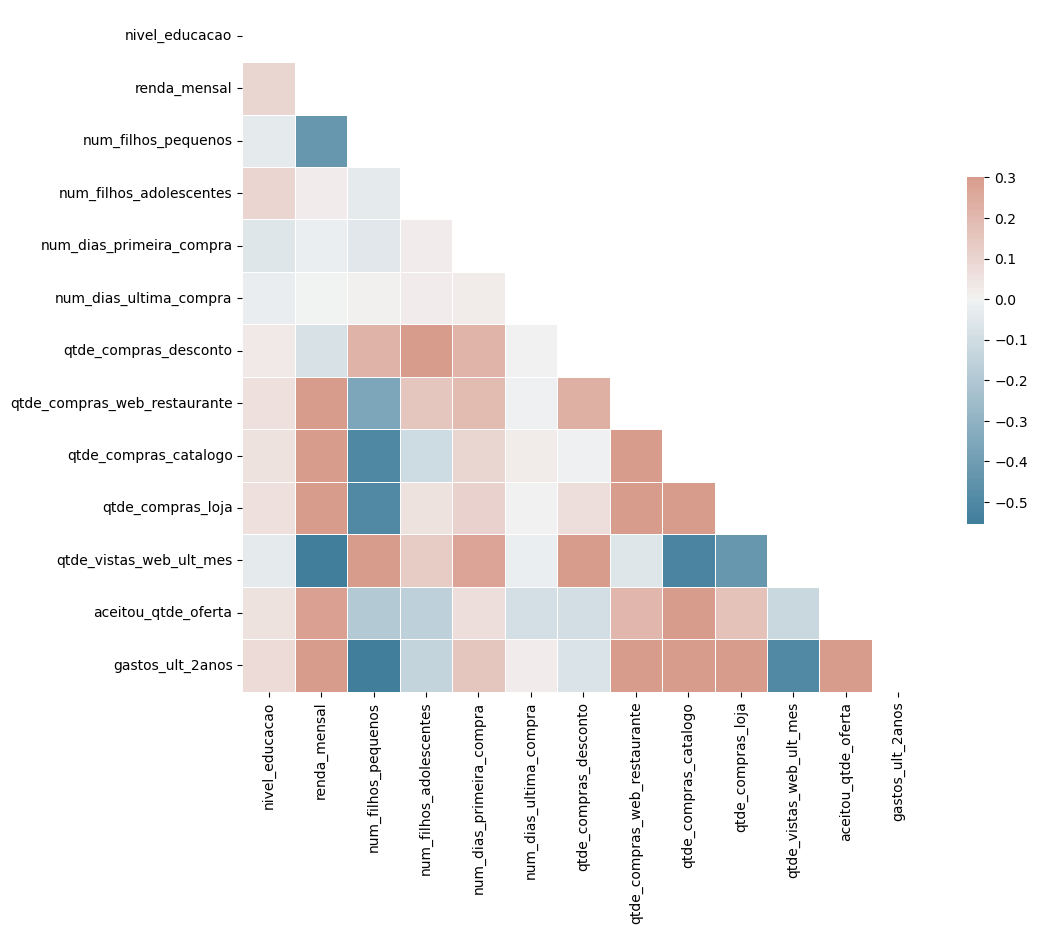

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_encoded.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Atividade 5: Faça e teste de esfericidade de Bartlett e conclua se as variáveis estão correlacionadas.

Para realizar esse teste em `Python` usaremos a função `calculate_bartlett_sphericity` do pacote `factor_analyzer`.

**Atenção!** Este pacote não vem instalado por padrão! Para instalá-lo use o comando `!pip install factor_analyzer`.

A função que desejamos está no pacote `factor_analyzer` dentro do módulo `factor_analyzer`.

Para mais detalhes consulte a documentação do pacote [aqui](https://factor-analyzer.readthedocs.io/en/latest/index.html).

Está função retornará para nós dois valores: a estatística qui quadrado do teste e o p-valor. Consideraremos um nível de significância de 5%.

In [44]:
#!pip install factor_analyzer

In [27]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(data_encoded)

print("Chi-square value:", chi_square_value)
print("p-value:", p_value)

Chi-square value: 10713.991523994118
p-value: 0.0


## Atividade 6: Obtenha a medida de Kaiser-Meyer-Olkin e conclua se a análise fatorial é indicada.

Pequenos valores de KMO indicam que as correlações entre os pares de variáveis não podem ser explicadas por outras variáveis, indicando que a análise fatorial não é adequada.
KMO sempre varia entre 0 e 1, quanto maior melhor. Resultados abaixo de 0.5 indicam que análise fatorial não é adequada.

In [28]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(data_encoded)

print("KMO:", kmo_model)

KMO: 0.7949150156557034


## Atividade 7: Encontre o número adequado de fatores para este problema.

Para isso vamos usar a função `FactorAnalyzer` e o método `get_eigenvalues()` aplicado ao um objeto da classe `FactorAnalyzer`, após este calcular valores dos dados.

O método `get_eigenvalues()` retorna dois objetos, sendo que o primeiro são os autovalores.

In [29]:
# importando a função FactorAnalyzer
from factor_analyzer import FactorAnalyzer

# criando um objeto para fazer análise fatorial
fa = FactorAnalyzer(rotation=None)

# aplicando a análise fatorial aos dados
fa.fit(data_encoded)

# obtendo os autovalores
ev, v = fa.get_eigenvalues()
ev

array([4.2083618 , 1.83126734, 1.22972487, 1.07106152, 0.94501415,
       0.78810935, 0.68583163, 0.6175906 , 0.47091699, 0.41778947,
       0.30592078, 0.27241685, 0.15599465])

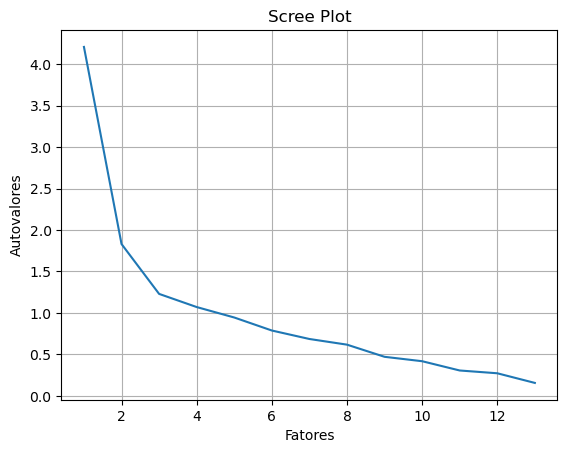

In [30]:
# importando matplotlib para fazer algumas customizações no gráfico
import matplotlib.pyplot as plt

# Criando um scree plot
sns.lineplot(x=range(1, data_encoded.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.grid();

4 autovalores maiores que 1, representando 4 fatores.

## Atividade 8: Calcule a variância explicada acumulada.

Para isso vamos usar o método `get_factor_variance()` aplicado ao nosso objetivo usado na realizaação da análise fatorial.

In [32]:
# criando um objeto para fazer análise fatorial com 4 fatores
fa = FactorAnalyzer(n_factors=4, rotation=None)

# aplicando a análise fatorial aos dados
fa.fit(data_encoded)

# criando nome para as colunas do DataFrame de cargas fatoriais
colunas = []
for i in range(4):
  colunas.append('Fator ' + str(i))

# criando DataFrame para auxiliar a visualização do resultado
variancia_fator = pd.DataFrame(fa.get_factor_variance(),
                   index=['Variância','Variância Proporcional','Variância Acumulada'],
                   columns=colunas)

variancia_fator

,Fator 0,Fator 1,Fator 2,Fator 3
Variância,3.896027,1.569570,0.701373,0.407518
Variância Proporcional,0.299694,0.120736,0.053952,0.031348
Variância Acumulada,0.299694,0.420431,0.474382,0.505730


4 fatores representam cerca de 50% da variabilidade dos dados.

### Comunalidades

Comunalidade é a proporção da variância de cada variável que pode ser explicada pelos fatores. Rotação não tem influência nas comunalidades.

In [33]:
pd.DataFrame(fa.get_communalities(),
             index=data_encoded.columns,
             columns=['Comunalidades'])

,Comunalidades
nivel_educacao,0.015746
renda_mensal,0.551128
num_filhos_pequenos,0.496542
num_filhos_adolescentes,0.342679
num_dias_primeira_compra,0.193754
num_dias_ultima_compra,0.001695
qtde_compras_desconto,1.001154
qtde_compras_web_restaurante,0.510702
qtde_compras_catalogo,0.665384
qtde_compras_loja,0.580997


## Atividade 9: Rotacione os fatores.

Como estamos trabalhando com fatores que influenciam cliente, é interessante não ter um número muito grande, por isso vamos usar 4 fatores na análise a seguir.

Esse processo pode ser feito de forma simples ao passar para a função `FactorAnalyzer()` os parâmetros de interesse, que no nosso caso são `n_factors` e `rotation='varimax`.

Após expor nosso objeto aos dados, vamos acessar o atributo `loadinds_` que possui as cargas fatoriais.

In [34]:
# realizando a análise fatorial com rotação
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(data_encoded)

# criando DataFrame de cargas fatoriais
cargas_fat = pd.DataFrame(fa.loadings_,
                          index=data_encoded.columns,
                          columns=colunas)
cargas_fat

,Fator 0,Fator 1,Fator 2,Fator 3
nivel_educacao,0.086167,-0.010701,0.011891,0.089805
renda_mensal,0.727839,-0.141078,-0.010531,0.036945
num_filhos_pequenos,-0.635033,0.011287,0.280329,-0.120682
num_filhos_adolescentes,-0.026485,0.132486,0.131275,0.554249
num_dias_primeira_compra,0.104001,0.409614,0.110536,-0.054186
num_dias_ultima_compra,0.000784,-0.020360,0.004152,0.035539
qtde_compras_desconto,-0.029293,0.333264,0.853163,0.401677
qtde_compras_web_restaurante,0.568094,0.372225,0.042797,0.218147
qtde_compras_catalogo,0.792216,-0.060460,0.099136,-0.155867
qtde_compras_loja,0.734541,0.063307,-0.021203,0.192325


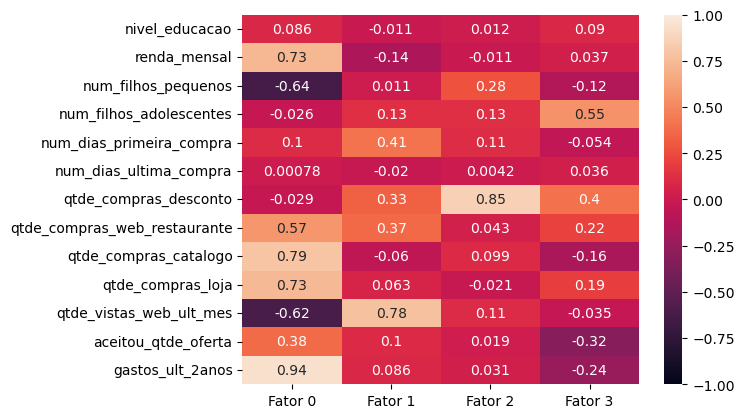

In [35]:
# observando o valor das cargas fatoriais com heatmap
sns.heatmap(cargas_fat, vmin=-1, vmax=1, annot=True);

## Atividade 10: Obtenha a relação de cada fator com as variáveis que ele está influenciando.

Cargas fatoriais indicam quanto um fator explica uma variável. Esses valores variam de -1 a 1. Quanto mais próximo de -1 ou de 1, mais o fator explica a variável.

Vamos estabelecer um valor de corte para poder entender quais fatores explicam quais variáveis. Vamos considerar que esse valor de corte será 0.5.

In [37]:
# criando o dicionário
fatores_variaveis = {}

# preenchendo o dicionário
for i in range(4):
  fatores_variaveis['Fator ' + str(i)] = cargas_fat[cargas_fat.iloc[:,i] > 0.5].iloc[:,i].index.tolist()

fatores_variaveis

{'Fator 0': ['renda_mensal',
  'qtde_compras_web_restaurante',
  'qtde_compras_catalogo',
  'qtde_compras_loja',
  'gastos_ult_2anos'],
 'Fator 1': ['qtde_vistas_web_ult_mes'],
 'Fator 2': ['qtde_compras_desconto'],
 'Fator 3': ['num_filhos_adolescentes']}

## Atividade 11: Encontre um nome que represente cada fator.

- Fator 0: Este fator parece estar relacionado com a renda do cliente e os gastos, bem como com as compras em vários canais. Portanto, poderíamos chamá-lo de "Fator de Consumo e Renda".
- Fator 1: Este fator parece estar relacionado com a quantidade de visualizações na web no último mês, portanto, poderíamos chamá-lo de "Fator de Engajamento Online".
- Fator 2: Este fator parece estar relacionado com a quantidade de compras com desconto, portanto, poderíamos chamá-lo de "Fator de Compras com Desconto".
- Fator 3: Este fator está associado ao número de filhos adolescentes, portanto, poderíamos chamá-lo de "Fator de Família com Adolescentes".